In [8]:
from smr import File
import numpy as np

In [9]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_12deg/B091608/B091608_1218_Adapt.smr'
# f_name = '/mnt/data/kkarbasi/SimpleSpike-Felix/Felix 2006.09.06/Felix 2006.09.06 1313 List.smr'

In [11]:
smr_content = File(f_name)
smr_content.read_channels()

Not implemented (type = 6)
Not implemented (type = 6)
Not implemented (type = 6)
Not implemented (type = 5)
Not implemented (type = 5)


In [12]:
voltage_chan = smr_content.get_channel(0)
# HE_chan = smr_content.get_channel(1)
# VE_chan = smr_content.get_channel(2)

In [13]:
from kaveh.sorting.spikesorter import SimpleSpikeSorter

# Time range of data to process:
t_0 = 0 #s
t_end = 5 #s

idx_0 = int(np.round(t_0 / voltage_chan.dt))
idx_end = int(np.round(t_end / voltage_chan.dt))

prange = slice(idx_0, idx_end)

sss = SimpleSpikeSorter(voltage_chan.data[prange], voltage_chan.dt)
sss.run()

<IPython.core.display.Javascript object>


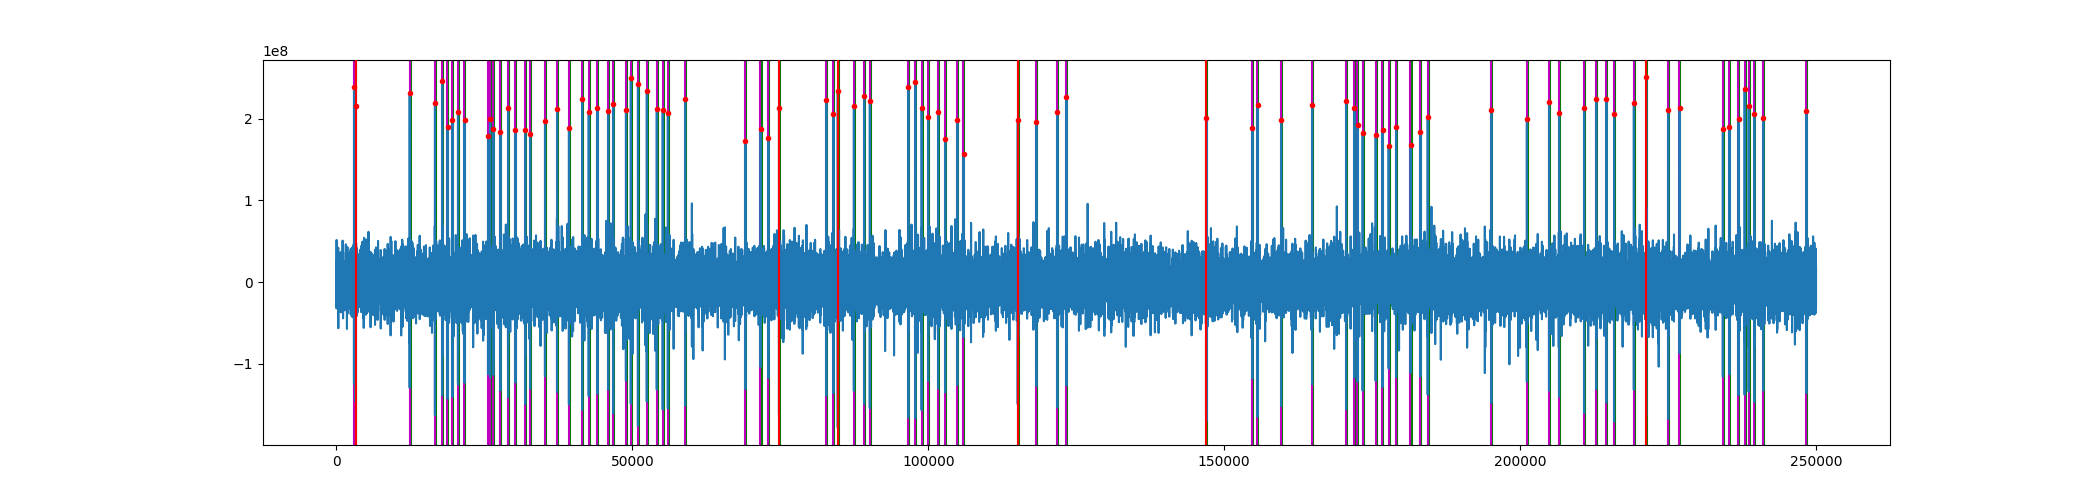

<IPython.core.display.Javascript object>


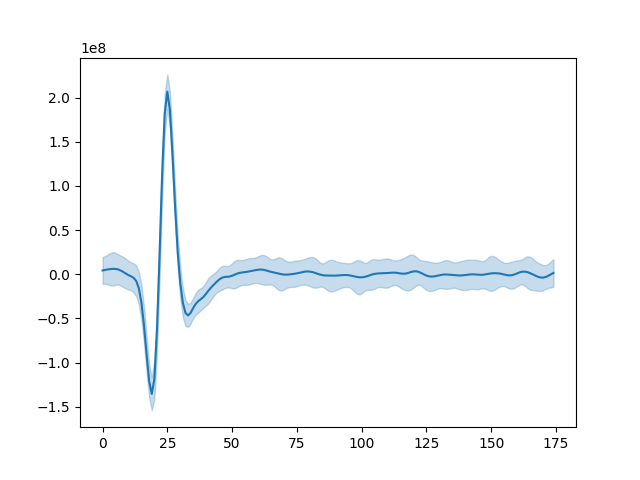

In [44]:
# Spike window (in seconds)
pre = 0.0005
post = 0.003

sss.set_spike_window(pre, post)
sss.plot_spike_peaks()
sss._align_spikes()
sss.plot_spike_waveforms_average()

In [30]:
from neo.io import Spike2IO
neo_reader = Spike2IO(filename=f_name)
neo_data = neo_reader.read()
data_block = neo_data[0]
seg = data_block.segments[0]
cs_spiketrain = np.array(seg.spiketrains[0])
cs_spiketrain = np.int32(cs_spiketrain/sss.dt)
cs_spiketrain = cs_spiketrain[np.where(np.logical_and(cs_spiketrain >= idx_0, cs_spiketrain < idx_end))]
cs_spike_indices = np.unique(closest_argmin(cs_spiketrain, sss.spike_indices))

In [48]:
axvlines(plt.gca(), sss.spike_indices[cs_spike_indices], color='r', zorder=10)

In [ ]:
int((cs_spiketrain/sss.dt)[2])

In [ ]:
np.searchsorted(sss.spike_indices, cs_spiketrain/sss.dt)

In [42]:
from kaveh.toolbox import closest_argmin
cs_spike_indices = np.unique(closest_argmin(cs_spiketrain, sss.spike_indices))

In [36]:
sss.spike_indices[80]

221308

In [24]:

cs_spiketrain = cs_spiketrain[np.where(np.logical_and(cs_spiketrain >= idx_0, cs_spiketrain < idx_end))]
# cs_spiketrain[idx_0 <= cs_spiketrain < idx_end]

array([  3220.5,   3226.5,  74774.5,  84701. ,  84707.5, 115121.5,
       146999.5, 147009. , 221305. , 221309.5, 221342. ])

In [ ]:
a = [1, 2, 3]
a[slice(0,1)]

In [ ]:
import matplotlib.pyplot as plt
spike_avg = np.mean(sss.aligned_spikes, axis = 0)
spike_std = np.std(sss.aligned_spikes, axis = 0)
x = np.arange(0, 50)

plt.figure()
plt.plot(x, spike_avg)

plt.fill_between(x, spike_avg - spike_std, spike_avg + spike_std, color='red', alpha=0.25)
plt.show()


plt.figure()
plt.plot(spike_std)